In [29]:
import tensorflow as tf

In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [31]:
mnist = tf.keras.datasets.mnist

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [115]:
test_images.shape

(10000, 28, 28)

In [44]:
train_labels.shape

(60000,)

In [72]:

labels_encoded = tf.one_hot(train_labels, 10)




In [119]:
labels_encoded_test = tf.one_hot(test_labels, 10)

In [120]:
testlabels=sess.run(labels_encoded_test)

In [80]:
trainlabels=sess.run(labels_encoded)

In [81]:
trainlabels.shape

(60000, 10)

In [71]:
train_images.shape

(60000, 784)

In [70]:
train_images=train_images.reshape((60000,784))

In [116]:
test_images=test_images.reshape((10000,784))

In [35]:
import numpy as np
import matplotlib.pyplot as plt

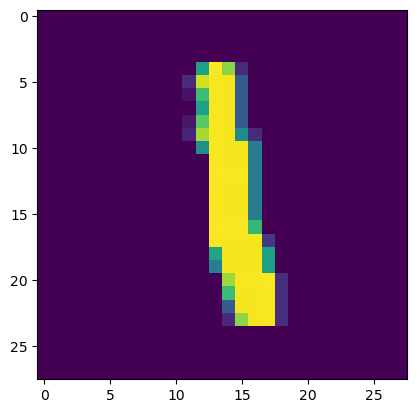

In [36]:
first_image=train_images[6]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [63]:
n_input=784
n_hidden=256
n_hidden2=256
n_classes=10

weights={
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden])),
    'h2' : tf.Variable(tf.random_normal([n_hidden,n_hidden2])),
    'out': tf.Variable(tf.random_normal([n_hidden2,n_classes]))
}

biases={
    'h1': tf.Variable(tf.random_normal([n_hidden])),
    'h2': tf.Variable(tf.random_normal([n_hidden2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [64]:
def fp(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output
    

In [65]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])


In [66]:
pred=fp(x,weights,biases)
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)

In [92]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [88]:
pred_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:train_images,y:trainlabels})
pred_eval,labels,correct_pred

(array([4, 4, 8, ..., 0, 4, 0]),
 array([5, 0, 4, ..., 5, 6, 8]),
 array([False, False, False, ..., False, False, False]))

In [89]:
correct_pred.sum()

3811

In [90]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [91]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)


In [113]:
for iter in range(100):
    c=sess.run([cost,optimize],feed_dict={x:train_images,y:trainlabels})
    print(c)

[316.8229, None]
[312.2748, None]
[310.38806, None]
[306.06827, None]
[301.74545, None]
[299.46106, None]
[295.08072, None]
[291.93512, None]
[288.3853, None]
[285.23254, None]
[282.6276, None]
[281.3436, None]
[278.32312, None]
[273.83792, None]
[269.29456, None]
[267.8848, None]
[263.5343, None]
[260.81186, None]
[257.04205, None]
[254.4409, None]
[251.48471, None]
[248.5059, None]
[245.06317, None]
[241.89449, None]
[239.26411, None]
[236.22578, None]
[233.70863, None]
[231.39244, None]
[230.2217, None]
[226.29404, None]
[224.72253, None]
[221.55183, None]
[218.2266, None]
[216.41017, None]
[213.57973, None]
[210.57086, None]
[208.26465, None]
[205.68646, None]
[203.00597, None]
[200.97736, None]
[197.55391, None]
[195.29977, None]
[193.169, None]
[190.01242, None]
[188.30685, None]
[185.06306, None]
[183.2354, None]
[181.0546, None]
[178.76431, None]
[176.18985, None]
[173.74489, None]
[171.5383, None]
[169.02676, None]
[166.86963, None]
[165.15027, None]
[163.27974, None]
[160.652

In [117]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)
pred_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:train_images,y:trainlabels})
pred_eval,labels,correct_pred
correct_pred.sum()


59736

In [118]:

tf.divide(correct_pred.sum(),60000)
z=tf.multiply(tf.divide(correct_pred.sum(),60000),100)
sess.run(z)

99.56

In [121]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)
pred_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:test_images,y:testlabels})
pred_eval,labels,correct_pred
correct_pred.sum()


9318

In [122]:

tf.divide(correct_pred.sum(),10000)
z=tf.multiply(tf.divide(correct_pred.sum(),10000),100)
sess.run(z)

93.17999999999999